## View training data
A utility to take a look at the trainig data that is used for the Mie Model, and compare it to Rhys's experimental data. Particularly interested in the vertical shifts needed to align the two, when we don't have the central points. 

In [1]:
import pickle
import math
import numpy as np
from scipy.special import jv, yv, jve, yve
import matplotlib.pyplot as plt
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold, train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import csv

In [2]:
#root = '/Users/sam/Documents/Nano-Mei'
root = '/Users/wsb/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofSouthampton/Phase retrieval with neural nets - Documents/nanoparticle Mie scattering project/mie Python code/wsb working'

# Use the with statement to open the file and automatically close it when you're done
#with open("{}/Iperp_data_ReducedSet_100Steps.pickle".format(root), "rb") as file:
with open("{}/Itotal_data2.pickle".format(root), "rb") as file:
    # Load the data from the file
    my_dict = pickle.load(file)

In [3]:
# Break apart keys and values from the dictionary 
keys_list = list(my_dict.keys())
values_list = list(my_dict.values())

print('Looking at first few keys ',keys_list[:3], len(keys_list))
foo = values_list[0]
print('Checking some values ',foo[:3], len(foo))
num_theta_values = len(foo)
#try to have a look at the first set of values
#plt.figure()
#plt.plot(np.log(values_list[0]))
#plt.show()

# Break the tuples in keys list into corresponding index and radius values
index = [a for a, _ in keys_list]
radius = [b for _, b in keys_list]
print('Length of index list is ',len(index))


# Turning lists into numpy arrays 
# could do the scaling right here...
np_index = np.array(index)
np_radius = 1e6 * np.array(radius) #added scaling
np_I = np.array(values_list)
log_np_I= np.log10(np_I) #take base 10 logs to match data
print(log_np_I.shape)


Looking at first few keys  [((1.3+1e-08j), 6e-06), ((1.3+1e-08j), 6.040404040404041e-06), ((1.3+1e-08j), 6.080808080808081e-06)] 10000
Checking some values  [3347931.6487979  2989769.86152343 2646420.84949515] 100
Length of index list is  10000
(10000, 100)


What I really need this to do is to be a way of looking at arbitrary data points in the training data, and also to look at some statistical properties. First the viewing. At present we have 100 index values, and 100 radius values, so why is the shape 10,000 x 100? Oh - it's 100 angles and 10,000 index/radius pairs. I see. So I can pick any number from 1 to 10k to see what it looks like

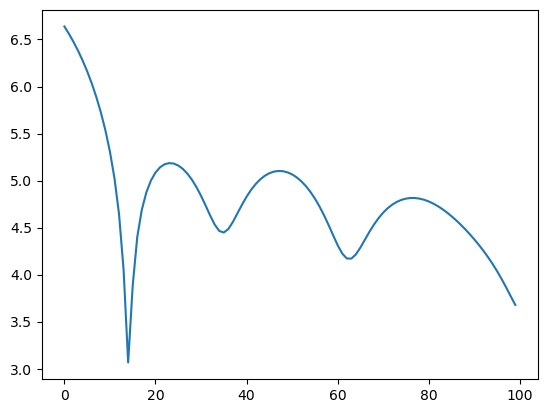

In [4]:
ii = 2534 #the angle array I want to see
plt.figure()
plt.plot(log_np_I[ii,:])
plt.show()

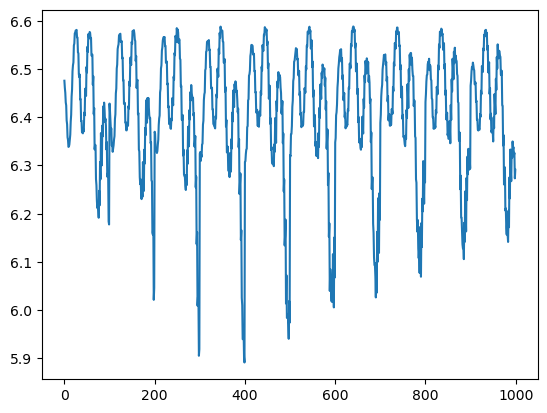

In [5]:
#look at the variation of the first points...
plt.figure()
plt.plot(log_np_I[:1000,1]) #first 1000 pts
plt.show()

So, the first point doesn't vary hugely - maybe from 5.9 to 6.6. I could just try to run things as they are and make all of the data points start at one value, or individually make them all start at about the same number. Interesting...might read in Rhys's data to compare it - pinch cells from the notebook that does that...OK, train's arrived, so later...

In [6]:
#this cell imports Rhys's experimental data into two arrays, angle and ints
root = '/Users/wsb/Library/CloudStorage/OneDrive-SharedLibraries-UniversityofSouthampton/Phase retrieval with neural nets - Documents/nanoparticle Mie scattering project/mie Python code/wsb working'

ints = np.zeros([18,100], dtype ="float")
angles = np.zeros([18,100], dtype ="float")

with open("{}/rhys_intensities.txt".format(root), "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    # Load the data from the file
    line_count = 0
    for row in csv_reader:
        
        #print(len(row))
        ints[line_count,:] = row[:] 
        line_count+=1

with open("{}/rhys_angles.txt".format(root), "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    # Load the data from the file
    line_count = 0
    for row in csv_reader:
        angles[line_count,:] = row[:] 
        line_count+=1
    

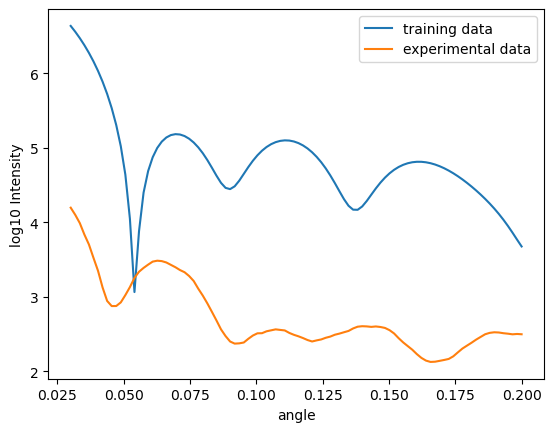

In [16]:
#let's compare data and simulation
jj = 10 #this picks out which of Rhys's 18 datasets you want to see
angles2 = np.linspace(0.03,0.2,100)
shift_up = log_np_I[ii,0]-ints[jj,0]

fig, ax = plt.subplots()
ax.plot(angles2,log_np_I[ii,:], label='training data')
ax.plot(angles[jj,:], ints[jj,:], label='experimental data')
#ax[1].plot(angles[jj,:], ints[jj,:])
ax.legend(loc='upper right')
ax.set_xlabel('angle')
ax.set_ylabel('log10 Intensity')
plt.show()